# Importing All Required Libreary:

In [18]:
import pandas as pd #we are using this library for data manipulation
import re #we are using this RegEx library for removing unwanted keyword ,url etc from dataset
import string
import nltk
import numpy as np#we are using this library for array data manipulation
import seaborn as sns # we are using this for 2-D data Visuall
import matplotlib.pyplot as plt # for the 3-D data Visuall
from sklearn.model_selection import train_test_split #we have use this for splitting our data into training and testing 
from sklearn.naive_bayes import MultinomialNB # we used this for naive_bayes model
from sklearn.linear_model import LogisticRegression #we have use this for logistic regression 
from sklearn.feature_extraction.text import TfidfVectorizer # have use this for feature extraction
import warnings # we are this worning so that if any warning we will come it will remove it 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
#with the help of this will print the accuracy ,precision recall and f1_score

# Preprocessing of The Dataset:

In [2]:
#we are reading the test and train_data and we are using only four column for this model Id,MovieName,Genre,And Summary

train_df = pd.read_csv("train_data.txt",engine="python",sep=" ::: ",names=["Id", "Movie", "Genre", "Summary"])

test_df = pd.read_csv("test_data_solution.txt",engine="python",sep=" ::: ",names=["Id", "Movie", "Genre", "Summary"])

In [3]:
#with the help of .head function we are showing  the top 5 recored of the  train dataset
train_df.head()

,Id,Movie,Genre,Summary
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [4]:
#with the help of .info function we are showing the info of the data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       54214 non-null  int64 
 1   Movie    54214 non-null  object
 2   Genre    54214 non-null  object
 3   Summary  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [5]:
#we are checking the all null value in the dataset
train_df.isnull().sum()

Id         0
Movie      0
Genre      0
Summary    0
dtype: int64

In [6]:
#with the help of .head function we are showing  the top 5 recored of the  train dataset
test_df.head()


,Id,Movie,Genre,Summary
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apart..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty chi..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family o...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with his..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a marti...


In [7]:
#with the help of .info function we are showing the info of the data
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       54200 non-null  int64 
 1   Movie    54200 non-null  object
 2   Genre    54200 non-null  object
 3   Summary  54200 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [8]:
#we are checking the all null value in the dataset
test_df.isnull().sum()

Id         0
Movie      0
Genre      0
Summary    0
dtype: int64

# EDA of The Dataset:

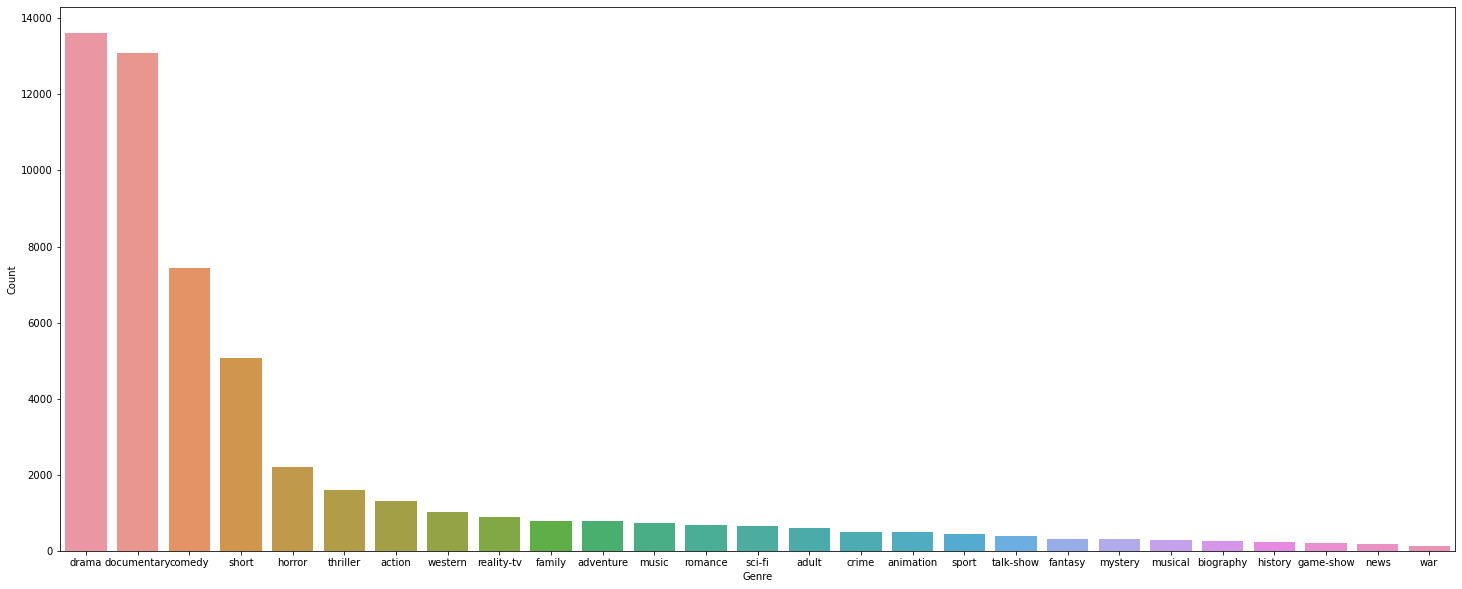

In [9]:
#we are showing the barplot of the Genre of train data
plt.figure(figsize=(25,10))
counts = train_df.Genre.value_counts()
sns.barplot(x=counts.index, y=counts)

plt.xlabel('Genre')
plt.ylabel('Count')
plt.show();

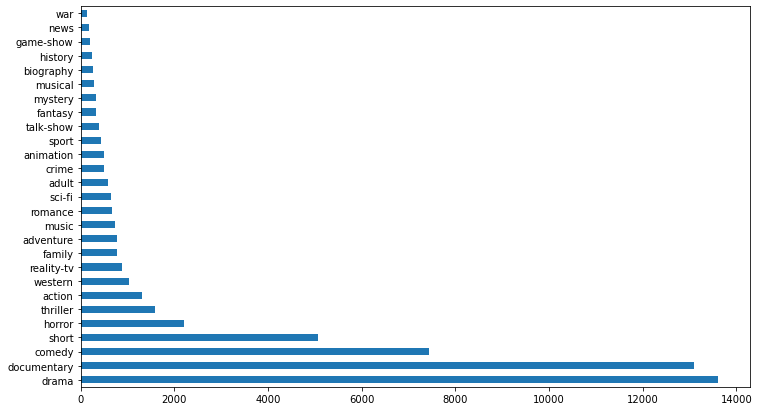

In [27]:
plt.figure(figsize=(12,7))
train_df['Genre'].value_counts().plot.barh()
plt.show()

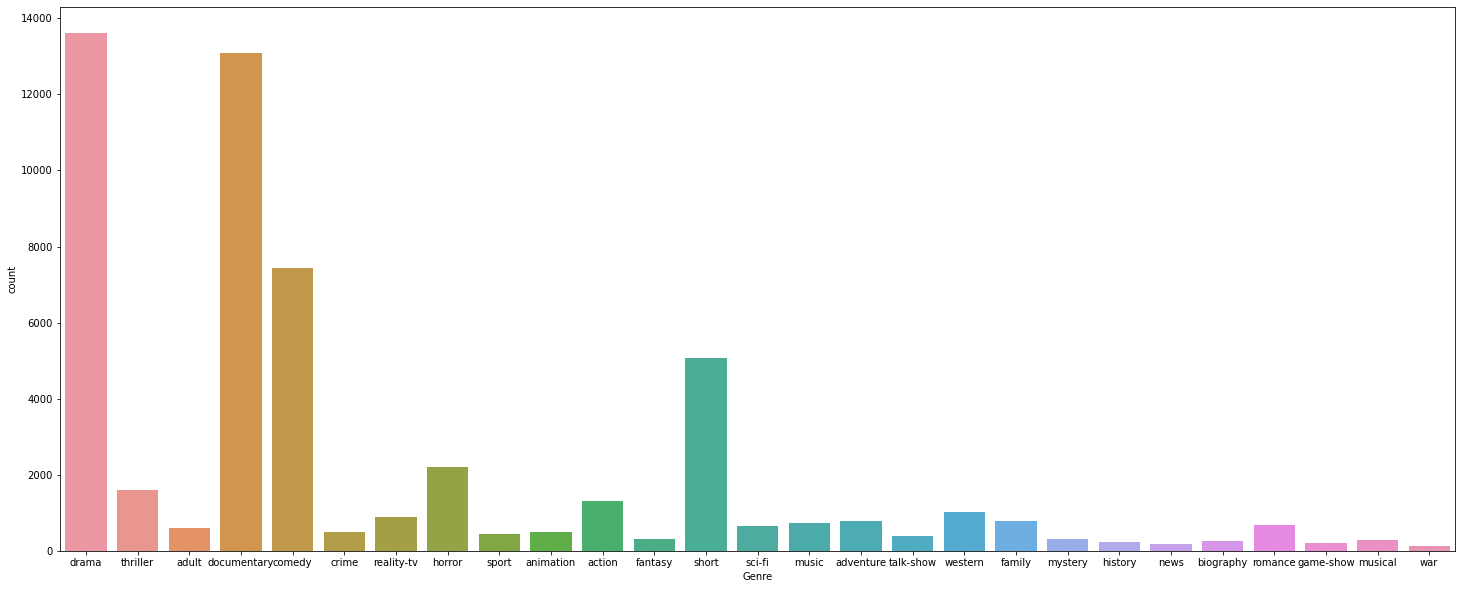

In [10]:
#we are showing the countplot of the Genre of train data
plt.figure(figsize=(25,10))
sns.countplot(x='Genre',data=train_df)
plt.show();

In [11]:
train_df['length']=train_df['Summary'].apply(len) 
#we are creating a new colunm called lenght we take the length of Summary colunm
train_df.head()

,Id,Movie,Genre,Summary,length
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...,545
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...,183
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...,649
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...,1081
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...,624


In [12]:
train_df.describe()

,Id,length
count,54214.000000,54214.000000
mean,27107.500000,599.452429
std,15650.378084,446.026620
min,1.000000,41.000000
25%,13554.250000,324.000000
50%,27107.500000,463.000000
75%,40660.750000,712.000000
max,54214.000000,10503.000000


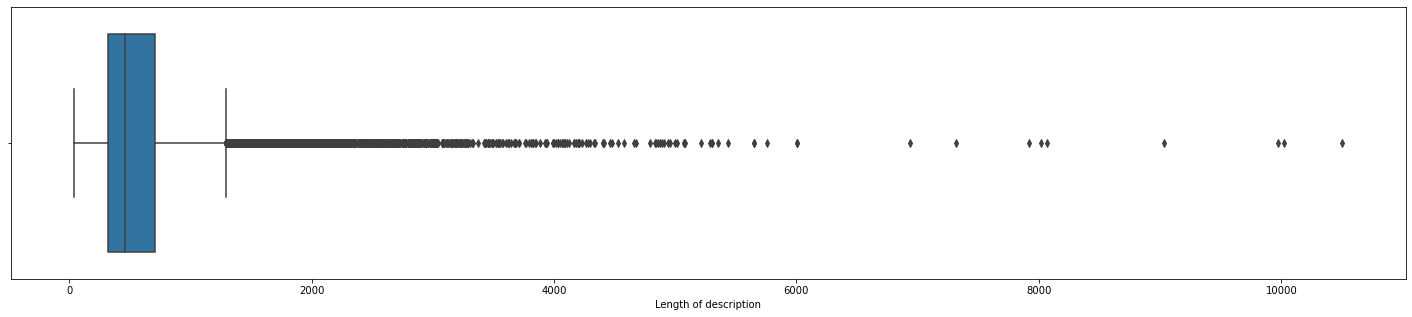

In [30]:
plt.figure(figsize=(25,5))
sns.boxplot(x=train_df['length'].values,hue='Genre',data=train_df)  # description length across all classes
plt.xlabel('Length of description')
plt.show()

#  Cleaning The Text Dataset:

In [13]:
# By using regEx we are cleaning the dataset
def clean_text(text):
    text = text.lower()                                  # remove all lower-case all characters
    text =  re.sub(r'@\S+', '',text)                     # removeall  twitter handles
    text =  re.sub(r'http\S+', '',text)                  # remove urls present in summary colunm
    text =  re.sub(r'pic.\S+', '',text) 
    text =  re.sub(r"[^a-zA-Z+']", ' ',text)             # only keeps characters in the summary column
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text+' ')      # keep words with length>1 only int the summary coumn
    text = "".join([i for i in text if i not in string.punctuation])
    return text

In [14]:
train_df['Text_cleaning'] = train_df.Summary.apply(clean_text) #we are  applying clean_test in our tain and test dataset in the summary colunm
test_df['Text_cleaning'] = test_df.Summary.apply(clean_text)
test_df.head()

,Id,Movie,Genre,Summary,Text_cleaning
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apart...",l brane loves his life his car his apartmen...
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty chi...",spain march quico is very naughty child...
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family o...,one year in the life of albin and his family o...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with his...",his father has died he hasnt spoken with his ...
4,5,Er nu zhai (1955),drama,Before he was known internationally as a marti...,before he was known internationally as martial...


In [15]:
train_df['length_Text_cleaning']=train_df['Text_cleaning'].apply(len)
train_df.head()

,Id,Movie,Genre,Summary,length,Text_cleaning,length_Text_cleaning
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...,545,listening in to conversation between his docto...,540
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...,183,a brother and sister with past incestuous rela...,180
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...,649,as the bus empties the students for their fiel...,646
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...,1081,to help their unemployed father make ends meet...,1065
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...,624,the films title refers not only to the un reco...,622


# Feature Extraction (TF-IDF):

In [16]:
tfidf_vectorizer = TfidfVectorizer(max_features=50000) #we have created the object for the tfIDF
X_tfidf = tfidf_vectorizer.fit_transform(train_df['Text_cleaning'])#we are fitting it in training and testing dataset
X_test_tfidf = tfidf_vectorizer.transform(test_df['Text_cleaning'])


# Naive Bayes Model:

In [17]:
nb_classifier = MultinomialNB()# we are creating model object 
nb_classifier.fit(X_tfidf, train_df['Genre'])  # Use train_df['genre'] without one-hot encoding

MultinomialNB()

In [19]:
# Suppress warnings related to undefined metrics
warnings.filterwarnings("ignore", category=UserWarning, message="Accuracy ,Precision and F-score are ill-defined.*")

# Predict using the Naive Bayes classifier
nb_predictions = nb_classifier.predict(X_test_tfidf)

# Calculating the  accuracy of the model
accuracy = accuracy_score(test_df['Genre'], nb_predictions)
print("Naive Bayes Accuracy:", accuracy)

# Calculating the  precision, recall, and F1-score of the model
precision = precision_score(test_df['Genre'], nb_predictions, average='weighted')
recall = recall_score(test_df['Genre'], nb_predictions, average='weighted')
f1 = f1_score(test_df['Genre'], nb_predictions, average='weighted')

print("Naive Bayes Precision:", precision)
print("Naive Bayes Recall:", recall)
print("Naive Bayes F1-score:", f1)
# Restore warning settings
warnings.resetwarnings()

Naive Bayes Accuracy: 0.4532287822878229


C:\Users\palvi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Precision: 0.4875445605068033
Naive Bayes Recall: 0.4532287822878229
Naive Bayes F1-score: 0.32554706813415335


# Logistic Regression Model:

In [20]:
# Logistic Regression
logreg_classifier = LogisticRegression(max_iter=1000) # we are creating the model object 
logreg_classifier.fit(X_tfidf,train_df['Genre'] ) # after that  we are fitting it 

LogisticRegression(max_iter=1000)

In [24]:
warnings.filterwarnings("ignore", category=UserWarning, message="Accuracy,Precision and F-score are ill-defined.*")
# Predict using the Logistic Regression classifier
logreg_predictions = logreg_classifier.predict(X_test_tfidf)

# Calculate accuracy
logreg_accuracy = accuracy_score(test_df['Genre'], logreg_predictions)
print("Logistic Regression Accuracy:", logreg_accuracy)

# Calculate precision, recall, and F1-score
logreg_precision = precision_score(test_df['Genre'], logreg_predictions, average='weighted')
logreg_recall = recall_score(test_df['Genre'], logreg_predictions, average='weighted')
logreg_f1 = f1_score(test_df['Genre'], logreg_predictions, average='weighted')

print("Logistic Regression Precision:", logreg_precision)
print("Logistic Regression Recall:", logreg_recall)
print("Logistic Regression F1-score:", logreg_f1)
warnings.resetwarnings()


Logistic Regression Accuracy: 0.5933210332103321


C:\Users\palvi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Precision: 0.5807645454386413
Logistic Regression Recall: 0.5933210332103321
Logistic Regression F1-score: 0.5478414286659508
